# Mécanique Quantique - Travail d'analyse numérique 

<b> Nom </b> : Nicolas De Ro Miralles <br>
<b> Matricule </b> : 000459498 <br>
<b> Section </b> : BA3-PHYS

## Enoncé

Considérons l'équation différentielle à coefficients constants suivante,

\begin{align}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0\hspace{5cm} (1)
\end{align}

où $f:[0,1] \mapsto \mathbb{R}$ est une fonction d'une seule variable $x$.

On donne de plus les conditions aux bords suivantes,

$\left\{
\begin{array}{c}
    f(0)=a \\
    f'(0)=b \\
    f(1)=c \\
    f'(1)=d
\end{array}
\right.$





<font color="blue"> <b> Question 1.</b> <br> Quelle est la solution générale de l'équation <b> (1) </b> ?</font> 

Soit l'équation différentielle à coefficients constants suivantes, 

\begin{align}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0
\end{align}

Supposons que la solution puisse s'écrire comme $f(x)=e^{\lambda x}$ pour $\lambda \in \mathbb{R}$. Alors, on a que,

$\left\{
\begin{array}{c}
    \frac{d^4 f}{dx^4}=\lambda^4 e^{\lambda x} \\
    -5 \frac{d^2 f}{dx^2}=-5\lambda^2 e^{\lambda x} 
\end{array}
\right.$

et l'équation différentielle prend donc la forme,

$$(\lambda^4-5\lambda^2+4)e^{\lambda x}=0$$ Or, $e^{\lambda x}\neq0 \; \forall x \in [0,1] \; \text{et} \; \forall \lambda \in \mathbb{R}$.

On résout donc $\lambda^4-5\lambda^2+4=0$. 

En posant $X=\lambda^2$ on retrouve l'équation du seond degré suivante, $$X^2-5X+4=0$$ qui admet les solutions $X=1$ et $X=4$. 

C'est-à-dire que les valeurs possibles pour $\lambda$ sont -2, -1, 1 et 2.

Ainsi, les solutions de $\textbf{(1)}$ sont les suivantes, $f(x)=c_1 e^{-2x}$ ou $f(x)=c_2 e^{-x}$ ou $f(x)=c_3 e^{x}$ ou encore, $f(x)=c_4 e^{2x}$ où les $c_i$ sont des constantes $\forall i=1, 2, 3, 4$.

La solution générale peut donc s'écrire de la forme générale suivante,

$$f(x)=c_1 e^{-2x} + c_2 e^{-x} + c_3 e^{x} + c_4 e^{2x} \hspace{5cm} (2)$$



<font color="blue"> <b> Question 2.</b> <br> Ecrire un code Python qui permet d'évaluer les constantes d'intégrations de la solution en termes des conditions aux bords.</font> 

Déterminons dans un premier temps l'expression formelle de ces conditions aux bords.

- La condition au bord $f(0)=a$ donne que $c_1+c_2+c_3+c_4=a$.
- La condition au bord $f'(0)=b$ donne que $-2c_1-c_2+c_3+2c_4=b$.
- La condition au bord $f(1)=c$ donne que $\frac{c_1}{e^2}+\frac{c_2}{e}+c_3 e+c_4 e^2=c$.
- La condition au bord $f'(1)=d$ donne que $-\frac{2 c_1}{e^2}-\frac{c_2}{e}+c_3 e+2c_4 e^2=d$.

L'objectif est maintenant de déterminer ces constantes $c_i$ à partir de la donnée de $a, b, c$ et $d$. Il s'agit donc de résoudre le système d'équations linéaires suivantes d'inconnues $c_1$, $c_2$, $c_3$ et $c_4$,

$\left\{
\begin{array}{c}
    c_1+c_2+c_3+c_4=a \\
    -2c_1-c_2+c_3+2c_4=b \\
    \frac{c_1}{e^2}+\frac{c_2}{e}+c_3 e+c_4 e^2=c \\
    -\frac{2 c_1}{e^2}-\frac{c_2}{e}+c_3 e+2c_4 e^2=d
\end{array}
\right.$

La résolution analytique de ce système fournit une solution dont l'expression est assez longue et que nous n'allons pas expliciter ici.

Ecrivons à présent un code Python qui permet la résolution d'un tel système.



Importons pour ce faire les bibliothèques nécessaires.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import sympy as sp
import time
import numba
from numba import jit

On va utiliser la fonction <b> linalg.solve </b> de Numpy. Ceci requiert d'écrire le système sous forme matricielle, c'est-à-dire de la forme $$AX=B$$ où $A$ et $B$ sont les matrices des coefficients de l'équation et $X$ la matrice des inconnues. On aura donc ici que,

$A=\begin{pmatrix}
1      & 1    & 1 & 1 \\
-2     & -1   & 1 & 2 \\
1/e^2  & 1/e  & e & e^2 \\
-2/e^2 & -1/e & e & 2 e^2 
\end{pmatrix}, \hspace{0.5cm}
B=\begin{pmatrix}
a \\
b \\
c \\
d
\end{pmatrix} \; \text{et} \hspace{0.5cm}
X=\begin{pmatrix}
c_1 \\
c_2 \\
c_3 \\
c_4
\end{pmatrix}
$

In [26]:
e=np.exp(1) # Définition du nombre e.

def constants(a,b,c,d):
    """
    Function giving back the values of the constants of integration.
    
    Parameters.
    -----------
    
    a, b, c, d : boundary values.
    
    Returns.
    --------
    
    X : array containing the values of c_1, c_2, c_3 and c_4.

    
    """
    A=np.array([[1,1,1,1],[-2,-1,1,2],[1/(e**2),1/e,e,e**2],[-2/(e**2),-1/e,e,2*e**2]]) # On définit les matrices A et B.
    B=np.array([a,b,c,d])
    X=np.linalg.solve(A,B) # Matrices contenant les valeurs des constantes c_i.
    
    return X

<font color="blue"> <b> Question 3.</b> <br> Que vaut la solution de l'équation <b> (1) </b> pour $a=0$, $b=0$, $c=1$ et $d=-1$. Représenter cette fonction sur un graphique.</font> 

Déterminons la valeurs des constantes d'intégrations $c_i$ pour de telles valeurs au limite.

In [27]:
c=constants(0,0,1,-1)
print(c)

[ 3.35228144 -5.33739176  2.60304954 -0.61793922]


Ainsi, on a que, 

$\left\{
\begin{array}{c}
    c_1=3.35228 \\
    c_2=-5.33739 \\
    c_3=2.60305 \\
    c_4=-0.61794 \\
\end{array}
\right.$

On peut donc construire la fonction $f$ qui est solution de l'équation différentielle <b> (1) </b> avec les conditions aux bords imposées à partir de l'expression <b> (2) </b>. On construit pour ce faire une fonction plus globale qui prend comme paramètre les valeurs aux bords et renvoie la fonction recherchée.

In [28]:
def solution(a,b,c,d,N):
    """"
    Function that gives back the function that is solution of the differential equation (1) according to the boundary values imposed.
    
    Parameters.
    -----------
    
    a, b , c, d : boundary values.
    
    N : numper of points in the [0,1] interval.
    
    Returns.
    --------
    
    x : [0,1] interva discretized.
    
    y : value of f(x) at each point of x array.
    
    """
    A=np.array([[1,1,1,1],[-2,-1,1,2],[1/e**2,1/e,e,e**2],[-2/e**2,-1/e,e,2*e**2]]) 
    B=np.array([a,b,c,d])
    X=np.linalg.solve(A,B)
    x=np.linspace(0,1,N) # Subdivision de l'intervalle [0,1]
    y=X[0]*np.exp(-2*x)+X[1]*np.exp(-x)+X[2]*np.exp(x)+X[3]*np.exp(2*x) # Evaluation de la fonction f.
    
    return x,y

On peut représenter cette fonction sur l'intervalle $[0,1]$.

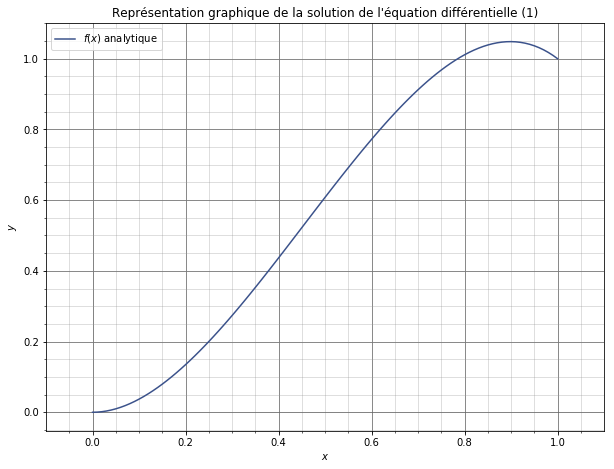

In [29]:
x,analytique=solution(0,0,1,-1,101)

fig = plt.figure(figsize=(10,7.5))
couleurs = plt.cm.viridis(np.linspace(0,1,5))
plt.plot(x,analytique, color=couleurs[1], label='$f(x)$ analytique')

# Customisation du graphique.

ax=plt.gca()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Représentation graphique de la solution de l'équation différentielle (1)")
ax.set_xlim(-0.1,1.1)
ax.legend()
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.show() 

On voit bien, au passage, que $f(0)=0$ et que $f(1)=c=1$.

En guise de vérification supplémentaire, on peut utiliser la bibliothèque SimPy.

In [30]:
sp.init_printing()

On défini les variables que SimPy pourra utiliser comme des symboles.

In [31]:
t=sp.symbols('t')

In [32]:
solution=c[0]*sp.exp(-2*t)+c[1]*sp.exp(-t)+c[2]*sp.exp(t)+c[3]*sp.exp(2*t)

In [33]:
solution

On dérive maintenant l'expression précédente comme il se doit.

In [34]:
sp.diff(solution,t,t,t,t)-5*sp.diff(solution,t,t)+4*solution

In [35]:
sp.init_printing(use_latex=False)

On obtient bien 0 (les termes $10^{-16}$ et $10^{-15}$ sont issus du nombres de décimales limitées dans le calcul des constantes $c_i$).

<font color="blue"> <b> Question 4.</b> <br> Résoudre l'équation <b> (1) </b> par la méthode de Gauss-Seidel. Combien d'itérations sont-elles nécessaires ? Comparer la solution obtenue avec la solution obtenue à la <b> question 3</b>. </font> 

Pour rappel, la méthode de Gauss-Seidel est une méthode assez similaire à la méthode de Jacobi à la différence près qu'au cours des divers itérations on utilise la valeur de la solution calculée en un certain point dès que celle-ci est disponible, et ce au lieu d'attendre que l'itération calcule la valeur tout au long de l'intervalle.

Afin d'appliquer cette méthode, discrétisons d'abord les opérateurs $\frac{d^2 f}{dx^2}$ et $\frac{d^4 f}{dx^4}$ en utilisant une *finite central difference*. On a que, 

$$\frac{d^2 f}{dx^2}\Big|_{x=x_i}=\frac{f_{i-1}-2f_i+f_{i+1}}{\Delta x ^2}$$ et $$\frac{d^4 f}{dx^4}\Big|_{x=x_i}=\frac{f_{i-2}-4f_{i-1}+6f_i-4f_{i+1}+f_{i+2}}{\Delta x^4}$$

où on rappelle que $f_i=f(x_i)$.

L'équation <b> (1) </b> peut donc s'écrire de manière discrétisée comme,


$$\frac{f_{i-2}-4f_{i-1}+6f_i-4f_{i+1}+f_{i+2}}{\Delta x^4}-\frac{5f_{i-1}-10f_i+5f_{i+1}}{\Delta x ^2}+4f_i=0 \hspace{2cm} (3)$$

en isolant $f_i$,

$$f_i=\frac{-f_{i-2}+4f_{i-1}+4f_{i+1}-f_{i+2}+5(f_{i-1}+f_{i+1})\Delta x^2}{6+10\Delta x^2+4\Delta x^4} $$

Les conditions aux bords (deux conditions de Dirichlet et deux conditions de Neumann) s'écrivent comme, 

$\left\{
\begin{array}{c}
    f_0=a \\
    f_{n-1}=c \\
    \frac{-\frac{3}{2}f_0+2f_1-\frac{1}{2}f_2}{\Delta x}=b \\
    \frac{\frac{1}{2}f_{n-3}-2f_{n-2}+\frac{3}{2}f_{n-1}}{\Delta x}=d
\end{array}
\right.$

où on a écrit que $f_{n-1}=f(x_{n-1})$ est la fonction $f$ évaluée sur le point $x=1$. Pour la condition de Neumann au bord gauche et droit on a repectivement utilisé une *finite forward difference* et *finite backward difference* (du second ordre).

En particularisant à $a=0$, $b=0$, $c=1$ et $d=-1$, ces conditions s'écrivent comme,

$\left\{
\begin{array}{c}
    f_0=0 \\
    f_{n-1}=1 \\
    f_1=\frac{1}{4}f_2\\
    f_{n-2}=\frac{1}{4}f_{n-3}+\frac{3}{4}+\frac{\Delta x}{2}
\end{array}
\right.$

On commence par discrétiser l'intervalle $[0,1]$ en 101 points.

In [36]:
nx=101
dx=1/(nx-1)

On construit une liste qui reprend les conditions initiales.

In [49]:
f0=np.zeros(nx) 
f0[-1]=1
f0[-2]=(3/4)+(dx/2) 

# Les deux autres conditions sont 0.

Construisons maintenant la méthode de Gauss-Seidel. Définissons au préalable une routine qui donne la norme $L_2$ définie comme,


$$
\begin{equation}
\frac{\sqrt{\sum_{i=0}^{n-1} \left|f^{k+1}_{i} - f^k_{i}\right|^2}}{\sqrt{\sum_{i=0}^{n-1} \left|f^k_{i}\right|^2}}
\end{equation}
$$

Cette norme nous permettra de contrôler la convergence des itérations vers la solution recherchée.

In [38]:
def L2_rel_error(p, pn):
    """"
    Compute the relative L2 norm of the difference.
    
    Parameters:
    -----------
    
    p : array of float.
        
    pn: array of float.

    Returns:
    --------
    
    Relative L2 norm of the difference.
    
    """
    
    return np.sqrt(np.sum((p - pn)**2)/np.sum(pn**2))

On construit la méthode de Gauss-Seidel. Le calcul étant assez long, on va utiliser le compilateur Numba.

In [39]:
@jit(nopython=True)
def gauss_seidel(f0, maxiter=3e6, rtol=1e-8):
    """"
    Function that implements the Gauss-Seidel method given a set of initial conditions.
    
    Paramaters:
    -----------
    
    f0 : initial conditions imposed.
    
    maxiter : defines the number of maximum iterations allowed.
    
    rtol : succesive difference between tow iterations. Default value : 10^{-8}.
    
    Returns:
    --------
    
    f : computed solution.
    
    ite : number of iterations done.
    
    convergence : L_2 error for each successive iteration.
    
    iteration : number of iteration.
    
    """
    f=f0.copy() # Solution initiale.
    diff = rtol + 1.0
    ite=0
    convergence=[]
    iteration=[]
    
    while diff > rtol and ite < maxiter: # Si la différence est inférieure à 1e-8 OU que le nombre d'itérations maximales est dépassé, on arrête le calcul.
    
        fn=f.copy()
        for j in range(2,nx-2): # Calcul de la solution.
            f[j]=((-f[j-2]+4*f[j-1]+4*f[j+1]-f[j+2])+(5*f[j-1]+5*f[j+1])*(dx**2))/(6+10*(dx**2)+4*(dx**4))
            
        f[1]=(1/4)*f[2] # On implémente les conditions aux bords.
        f[-2]=(1/4)*f[-3]+(3/4)+(dx/2)
        
        diff=np.sqrt(np.sum((f - fn)**2)/np.sum(fn**2)) # On calcule la norme L2.
        
        convergence.append(diff) # Contient l'historique des normes L_2.
        iteration.append(ite) # Contient l'historique du nombre d'itérations.
        
        ite+=1
    
    return f,ite,convergence,iteration

In [40]:
start_time=time.time()
solution_gs,iteration_gs,convergence_gs,it_gs=gauss_seidel(f0)
end_time=time.time()
t_gs=end_time-start_time

Représentons sur un graphique la solution analytique et la solution calculée par la méthode de Gauss-Seidel.

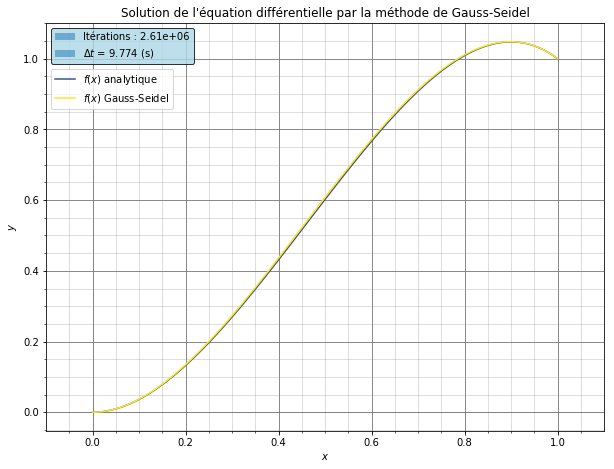

In [41]:
fig = plt.figure(figsize=(10,7.5)) # On initialise une figure matplotlib.
couleurs = plt.cm.viridis(np.linspace(0,1,5)) # Couleur des graphes.

plt.plot(x,solution_gs, color=couleurs[1], label='$f(x)$ analytique') # Solution analytique. 
plt.plot(x,analytique, color=couleurs[4], label='$f(x)$ Gauss-Seidel') # Solution calculée par la méthode de Gauss-Seidel.

# Customisation.

ax1=plt.gca()
ax=plt.gca()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Solution de l'équation différentielle par la méthode de Gauss-Seidel")
ax.set_xlim(-0.1,1.1)
ax.legend()
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)

# Légendes.

handles=[mpl_patches.Rectangle((0, 0), 0.1, 1, lw=0, alpha=0.5)] * 2
labels=[]
labels.append("Itérations : {0:.4g}".format(iteration_gs))
labels.append(r"$\Delta t$ = {0:.4g} (s)".format(t_gs))
legend1=ax1.legend(handles,labels,facecolor='lightblue',edgecolor="black")
ax = plt.gca().add_artist(legend1)
plt.legend(bbox_to_anchor=(0.237, 0.9))
plt.show() 

Mesurons la norme $L_2$ entre notre solution analytique et la solution donnée par la méthode de Gauss-Seidel.

In [42]:
print("L_2 norm difference :",L2_rel_error(solution_gs,analytique))

L_2 norm difference : 0.00524884966945307


Finalement, regardons comment la norme $L_2$ a évolué au cours des itérations. On construit pour ce faire le graphique suivant.

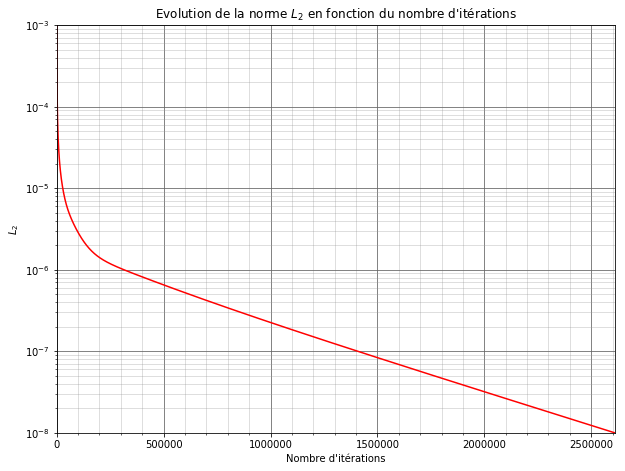

In [43]:
fig = plt.figure(figsize=(10,7.5)) # On initialise une figure matplotlib.

plt.semilogy(it_gs,convergence_gs,'r') # Echelle logarithmique en ordonnée.

# Customisation.

ax=plt.gca()
ax.set_xlabel("Nombre d'itérations")
ax.set_ylabel("$L_2$")
ax.set_title("Evolution de la norme $L_2$ en fonction du nombre d'itérations")
ax.set_xlim(0,iteration_gs)
ax.set_ylim(10e-9,10e-4)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.show() 

<font color="blue"> <b> Question 5.</b> <br> Résoudre l'équation <b> (1) </b> par la méthode du gradient conjugué. Combien d'itérations sont-elles nécessaires ? Comparer la solution obtenue avec la solution obtenue à la <b> question 3</b>. </font> 

Rappellons avant tout, sans entrer dans les détails, le processus itératifs de la méhode du gradient conjugué.

On commence par écrire l'équation différentielle (discrétisée) sous la forme, 

$\begin{align}
A\overrightarrow{p}=\overrightarrow{b}
\end{align}$

On choisit (ou plutôt devine) une solution de départ $\vec{p^0}$. L'idée est ensuite de modifier le vecteur $\overrightarrow{p}$ d'un pas $\alpha$ qui donnera un nouveau vecteur $\overrightarrow{p}'$. Ce processus itératif est alors censé converger vers la solution recherchée. Pour chacunes des étapes, on peut définir un vecteur résidu $\overrightarrow{r}^k$ tel que $\overrightarrow{r}^k=\overrightarrow{b}-A\overrightarrow{p}^k$.

Le processus itératif est le suivant,

- On calcule d'abord le pas $\alpha$ tel que $\alpha=\frac{\overrightarrow{r}^k \cdot \overrightarrow{r}^k}{A\overrightarrow{d}^k \cdot \overrightarrow{d}^k}$
- Ceci nous permet alors de déterminer la valeur de $\overrightarrow{p}^{k+1}$ d'après la relation $\overrightarrow{p}^{k+1}=\overrightarrow{p}^k+\alpha \overrightarrow{d}^k$
- On calcule ensuite le résidu $\overrightarrow{r}^{k+1}$ d'après la relation, $\overrightarrow{r}^{k+1}= \overrightarrow{r}^{k}-\alpha A \overrightarrow{d}^{k}$
- On calcule le coefficient $\beta$ défini tel que $\beta=\frac{\overrightarrow{r}^{k+1} \cdot \overrightarrow{r}^{k+1}}{\overrightarrow{r}^k \cdot \overrightarrow{r}^k}$
- La direction suivante du pas sera alors donnée par $\overrightarrow{d}^{k+1}=\overrightarrow{r}^{k+1}+\beta \overrightarrow{d}^k$


- On répète ensuite le schéma précédent.

Notons que la direction initiale $\vec{d_0}$ sera donnée par le résidu initial $\vec{r_0}$.


Dans notre cas, nous aurons ici que $\overrightarrow{b}=0$. L'opérateur $A$ sera donné par le membre de gauche de l'expression <b> (3) </b> ci-dessus. Mais on remarque que cette définition peu être ambigue. En effet, notre opérateur agit sur tous les points de la fonction $f$ sauf ceux de bords dont les valeurs sont fixées par les deux conditions de Dirichlet. Lorsqu'on applique la relation <b>(3)</b> au second et à l'avant dernier point, on remarque que l'expression fait appel à deux points fictifs qui se situent au-delà de notre grille.

Afin de palier ce problème, nous allons exprimer les conditions de Von Neumann en utlisant une <i>finite central difference</i>.

$\left\{
\begin{array}{c}
    f'(0)=0 \\
    f'(1)=-1 \\
\end{array}
\right.
\hspace{1cm} \implies \hspace{1cm}
\left\{
\begin{array}{c}
    \frac{-\frac{1}{2}f_{-1}+\frac{1}{2}f_1}{\Delta x}=0 \\
    \frac{-\frac{1}{2}f_{n-2}+\frac{1}{2}f_{n}}{\Delta x}=-1 \\
\end{array}
\right.
\hspace{1cm} \implies \hspace{1cm}
\left\{
\begin{array}{c}
    f_{-1}=f_1\\
    f_{n}=-2\Delta x+f_{n-2} \\
\end{array}
\right.
$

On peut maintenant utiliser la relation <b>(3)</b> afin de calculer la valeur de l'opérateur $A$ sur $f_1$ et $f_{n-1}$.

On obtient alors que,

$$A(f_1)=\frac{7f_1-4f_2+f_3}{\Delta x^4}+\frac{10 f_1-5f_2}{\Delta x^2}+4f_1$$

et,

$$A(f_{n-2})=\frac{f_{n-4}-4f_{n-3}+7f_{n-2}-4-2\Delta x}{\Delta x^4}-\frac{5f_{n-3}-10f_{n-2}+5}{\Delta x^2}+4f_{n-2}$$

On peut à présent construire la méthode des gradients conjugués.


In [44]:
def conjugated_gradient(f0, maxiter=3e6,rtol=1e-8):
    """"
    Function that implements the Gauss-Seidel method given a set of initial conditions.
    
    Paramaters:
    -----------
    
    f0 : initial conditions imposed.
    
    maxiter : defines the number of maximum iterations allowed.
    
    rtol : succesive difference between tow iterations. Default value : 10^{-8}.
    
    Returns:
    --------
    
    f : computed solution.
    
    ite : number of iterations done.
    
    convergence : L_2 error for each successive iteration.
    
    iteration : number of iteration.
    
    """
    
    def A(f): # Calcul de l'opérateur A.

        h=np.zeros(nx-2)
        h[1:-1]=(((f[:-4]-4*f[1:-3]+6*f[2:-2]-4*f[3:-1]+f[4:])/(dx**4))-((5*f[1:-3]-10*f[2:-2]+5*f[3:-1])/(dx**2))+4*f[2:-2])
        h[0]=((7*f[1]-4*f[2]+f[3])/(dx**4))+((10*f[1]-5*f[2])/(dx**2))+4*f[1]
        h[-1]=((f[nx-4]-4*f[nx-3]+7*f[nx-2]-4-2*dx)/(dx**4))-((5*f[nx-3]-10*f[nx-2]+5)/(dx**2))+4*f[nx-2]
        
        return h
    
    f=f0.copy() # Solution initiale.
    r=np.zeros_like(f) 
    Ad=np.zeros_like(f)
    diff=rtol + 1
    ite=0
    r[1:-1]=-A(f)
    d=r.copy()
    
    convergence=[]
    iteration=[]
    
    while diff > rtol and ite < maxiter: # Si la différence est inférieure à 1e-8 OU que le nombre d'itérations maximales est dépassé, on arrête le calcul.
        
        fk=f.copy()
        rk=r.copy()
        Ad[1:-1]=A(d)
        alpha=np.sum(r * r) / np.sum(d * Ad)
        f=fk+alpha * d
        r=rk-alpha * Ad
        beta=np.sum(r * r) / np.sum(rk * rk)
        d=r + beta * d
        
        diff=np.sqrt(np.sum((f - fk)**2)/np.sum(fk**2)) # On calcule la norme L2.
        
        convergence.append(diff) # Contient l'historique des normes L_2.
        iteration.append(ite) # Contient l'historique du nombre d'itérations.
        
        ite+=1
        
    return f,ite,convergence,iteration

In [45]:
start_time=time.time()
solution_cg,iteration_cg,convergence_cg,it_cg=conjugated_gradient(f0)
end_time=time.time()
t_cg=end_time-start_time

Représentons sur un graphique la solution analytique et la solution calculée par la méthode de Gauss-Seidel.

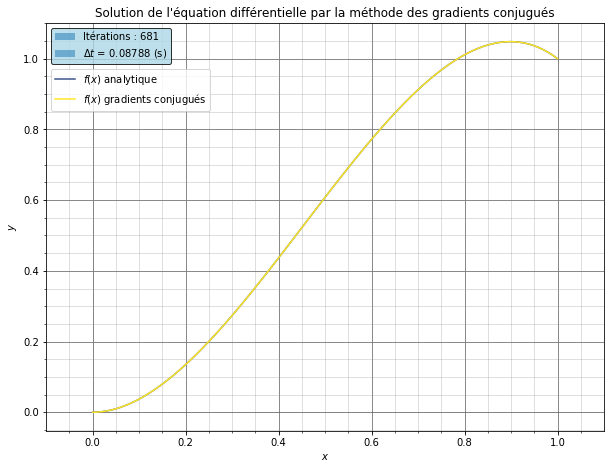

In [46]:
fig = plt.figure(figsize=(10,7.5)) # On initialise une figure matplotlib.
couleurs = plt.cm.viridis(np.linspace(0,1,5)) # Couleur des graphes.

plt.plot(x,analytique, color=couleurs[1], label='$f(x)$ analytique') # Solution calculée par la méthode des gradients conjugués.
plt.plot(x,solution_cg, color=couleurs[4], label='$f(x)$ gradients conjugués') # Solution analytique. 


# Customisation.

ax1=plt.gca()
ax=plt.gca()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Solution de l'équation différentielle par la méthode des gradients conjugués")
ax.set_xlim(-0.1,1.1)
ax.legend()
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)

# Légendes.

handles=[mpl_patches.Rectangle((0, 0), 0.1, 1, lw=0, alpha=0.5)] * 2
labels=[]
labels.append("Itérations : {0:.4g}".format(iteration_cg))
labels.append(r"$\Delta t$ = {0:.4g} (s)".format(t_cg))
legend1=ax1.legend(handles,labels,facecolor='lightblue',edgecolor="black")
ax = plt.gca().add_artist(legend1)
plt.legend(bbox_to_anchor=(0.303, 0.9))
plt.show() 

Mesurons la norme $L_2$ entre notre solution analytique et la solution donnée par la méthode de Gauss-Seidel.

In [47]:
print("L_2 norm difference :",L2_rel_error(solution_cg,analytique))

L_2 norm difference : 3.97996766179899e-05


Finalement, regardons comment la norme $L_2$ a évolué au cours des itérations. On construit pour ce faire le graphique suivant.

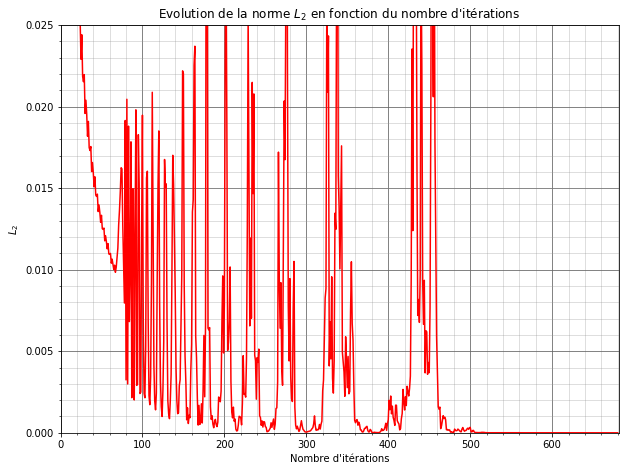

In [48]:
fig = plt.figure(figsize=(10,7.5)) # On initialise une figure matplotlib.

plt.plot(it_cg,convergence_cg,'r')

# Customisation.

ax=plt.gca()
ax.set_xlabel("Nombre d'itérations")
ax.set_ylabel("$L_2$")
ax.set_title("Evolution de la norme $L_2$ en fonction du nombre d'itérations")
ax.set_xlim(0,iteration_cg)
ax.set_ylim(0,0.025)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.show() 

## Discussion

Nous avons dans ce document implémenté deux méthodes différentes afin de résoudre numériquement la même équation différentielle. Discutons ci-dessous des résultats obtenus.


Regardons dans un premier temps la solution calculée par chacune des méthodes. Dans chacun des graphiques, la coube bleue correspond à la solution analytique calculée dans la <b>question 3</b>. A vue d'oeil, il semble que la solution calculée par la méthode des gradients conjugués (CG) soit meilleure. On ne voit effectivement plus la courbe bleue, cette dernière étant complètement confondue avec la courbe jaune. La solution calculée par la méthode de Gauss-Seidel (GS) est très légèrement décalée de la solution analytique. Cette <i>conjecture</i> visuelle se voit être confirmée par le calcul de la norme $L_2$ entre la solution analytique et la solution calculée. On a typiquement que $L_2(GS) \sim 5\cdot 10^{-3}$ alors que $L_2(CG)\sim 4\cdot 10^{-5}$. Ceci constituant une preuve mathématique du fait que la solution calculée par CG est bien meilleure que celle calculée par GS.

Le comportement même de ces deux méthodes est d'ailleurs fondamentalement différent. D'une part du fait de leur construction différente et d'autre part du fait des résultats obtenus. Par exemple, la solution CG est calculée en $681$ itérations alors qu'il en faut $2 609 892$ pour la méthode GS. En moins d'itérations, la méthode CG calcule une meilleure solution ! Le temps d'exécution de GS est d'ailleurs de l'ordre de $100$ fois celui de CG. Remarquons cependant que le nombre d'itérations effectuées par unité de temps est plus important avec la méthode GS ($\sim 2\cdot 10^{5}$) qu'avec la méthode CG ($\sim 8\cdot 10^{3}$). La vitesse de la norme $L_2$ est aussi très différente. D'abord très abrute puis <i>quasi</i> linéaire (sur une échelle logarithmique) pour la méthode GS, très fluctuante puis stagnante pour la méthode CG. Ces fluctuations sont inhérentes à la méthode CG. En effet, dès que l'on a calculé la solution après un certain nombre d'itérations, on passe à l'itération suivante en choisissant une certaine direction dans un espace à $n_x$ dimensions (dans notre cas, $n_x=101$). La direction choisie peut produire une nouvelle solution qui soit meilleure ou moins bonne que la précédente, d'où les fluctuations observées.

Si l'on dit qu'une méthode est efficace et performante si elle s'exécute rapidement et que la solution est calculée avec peu d'itérations, alors la méthode CG est bien plus efficace et performante que la méthode GS.